In [1]:
import pandas as pd
from torchtext.data.utils import get_tokenizer


c:\Users\kiw00\Documents\work\AIT\.venv\lib\site-packages\torchtext\data\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


Data source https://github.com/matbahasa/TALPCo/blob/master/eng/data_eng.txt 

In [2]:
with open("data_tha.txt", "r", encoding="utf-8") as f:
    thai = [l.split("\t")[1].strip() for l in f]

with open("data_eng.txt", "r", encoding="utf-8") as f:
    eng = [l.split("\t")[1].strip() for l in f]

print(thai)
print(eng)


['คุณทานากะไม่ใช่นักเรียนครับ', 'พ่อเป็นอาจารย์ครับ', 'โรงเรียนหยุดครับ', 'โตเกียวอากาศแจ่มใสครับ', 'ที่สวนสาธารณะมีต้นไม้ครับ', 'คุณทานากะอยู่ที่ไหนครับ', 'ไม่มีเงินครับ', 'บนโต๊ะมีหนังสือครับ', 'ใต้โต๊ะมีกระเป๋าครับ', 'ในกระเป๋ามีสมุดโน้ตครับ', 'คุณยามาดะอยู่ที่ข้างขวาของคุณทานากะครับ', 'คุณคิมูระอยู่ที่ข้างซ้ายของคุณทานากะครับ', 'หน้าบ้านมีแมวครับ', 'หลังบ้านมีรถยนต์ครับ', 'ตู้ไปรษณีย์อยู่ฝั่งตรงข้ามบ้านครับ', 'คุณยามาดะอยู่นอกห้องเรียนครับ', 'หน้าบ้านเป็นสวนสาธารณะครับ', 'โรงเรียนอยู่ใกล้บ้านครับ', 'หนังสืออยู่ในกระเป๋าครับ', 'ปากกาผมด้ามนี้ครับ', 'ห้องเรียนภาษาญี่ปุ่นอยู่ที่ไหนครับ', 'นั่นเป็นหนังสือพิมพ์เมื่อไรครับ', 'ที่ห้องเรียนมีคอมพิวเตอร์เครื่องใหม่ครับ', 'ในกล่องมีหมาตัวเล็กครับ', 'คุณทานากะเป็นคนร่าเริงครับ', 'เป็นหนังยังไงครับ', 'เป็นหนังเก่าของญี่ปุ่นครับ', 'จะซื้อรองเท้าคู่ไหนครับ', 'พจนานุกรมภาษาญี่ปุ่นคือเล่มนั้นครับ', 'กระเป๋าคุณทานากะอยู่ตรงนั้นครับ', 'อาจารย์อยู่ตรงโน้นครับ', 'หนังสือเล่มนั้นเป็นของผมครับ', 'กระเป๋าใบใหญ่ใบนั้นเป็นของผมครับ', 'โทษนะครับ ห้องน้ำอยู่

split Data (train,val,test)

In [3]:
from sklearn.model_selection import train_test_split

# pairs = list(zip(eng, thai))
pairs = list(zip(eng, thai))

# first split: train 80%, temp 20%
train_data, temp_data = train_test_split(
    pairs, test_size=0.2, random_state=42
)

# split temp into val 10% and test 10%
val_data, test_data = train_test_split(
    temp_data, test_size=0.5, random_state=42
)

print(len(train_data), len(val_data), len(test_data))


1097 137 138


In [4]:
from pythainlp.tokenize import word_tokenize
import spacy

nlp_en = spacy.load("en_core_web_sm")
def preprocess_th(text):
    tokens = word_tokenize(text, engine="newmm")
    return tokens

def preprocess_en(text):
    doc = nlp_en(text.lower())
    tokens = [tok.text for tok in doc if not tok.is_punct]
    return tokens


In [5]:
train_th_tokens = [preprocess_th(t[1]) for t in train_data]
train_en_tokens = [preprocess_en(t[0]) for t in train_data]

val_th_tokens = [preprocess_th(t[1]) for t in val_data]
val_en_tokens = [preprocess_en(t[0]) for t in val_data]

test_th_tokens = [preprocess_th(t[1]) for t in test_data]
test_en_tokens = [preprocess_en(t[0]) for t in test_data]


In [6]:
from torchtext.vocab import build_vocab_from_iterator

c:\Users\kiw00\Documents\work\AIT\.venv\lib\site-packages\torchtext\vocab\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\kiw00\Documents\work\AIT\.venv\lib\site-packages\torchtext\utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [7]:
def yield_tokens(data_iter):
    for tokens in data_iter:
        yield tokens

# Define special symbols and indices
UNK_IDX, PAD_IDX, SOS_IDX, EOS_IDX = 0, 1, 2, 3
# Make sure the tokens are in order of their indices to properly insert them in vocab
special_symbols = ['<unk>', '<pad>', '<sos>', '<eos>']
# Build vocab
vocab_th = build_vocab_from_iterator(
    yield_tokens(train_th_tokens),
    specials=special_symbols,
    min_freq=3
)
vocab_en = build_vocab_from_iterator(
    yield_tokens(train_en_tokens),
    specials=special_symbols,
    min_freq=3
)
vocab_th.set_default_index(vocab_th['<unk>'])
vocab_en.set_default_index(vocab_en['<unk>'])



In [8]:
encoded_train_en = [vocab_en[token] for token in train_en_tokens[0]]
encoded_train_th = [vocab_th[token] for token in train_th_tokens[0]]

encoded_val_en = [vocab_en[token] for token in val_en_tokens[0]]
encoded_val_th = [vocab_th[token] for token in val_th_tokens[0]]

encoded_test_en = [vocab_en[token] for token in test_en_tokens[0]]
encoded_test_th = [vocab_th[token] for token in test_th_tokens[0]]


In [9]:
def encode_sentence(tokens, vocab):
    return [vocab['<sos>']] + [vocab[t] for t in tokens] + [vocab['<eos>']]

train_en_ids = [encode_sentence(t, vocab_en) for t in train_en_tokens]
train_th_ids = [encode_sentence(t, vocab_th) for t in train_th_tokens]

val_en_ids = [encode_sentence(t, vocab_en) for t in val_en_tokens]
val_th_ids = [encode_sentence(t, vocab_th) for t in val_th_tokens]


In [10]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    """
    batch: a list of tuples (src_tensor, trg_tensor) returned from __getitem__
    """
    src_list, trg_list = [], []
    
    for src, trg in batch:
        src_list.append(src)
        trg_list.append(trg)

    # Use the PAD_IDX (1) we defined earlier
    src_padded = pad_sequence(src_list, padding_value=1)
    trg_padded = pad_sequence(trg_list, padding_value=1)

    return src_padded, trg_padded

In [11]:
import torch
from torch.utils.data import Dataset

class Seq2SeqDataset(Dataset):
    def __init__(self, src_ids, tgt_ids):
        self.src_ids = src_ids
        self.tgt_ids = tgt_ids

    def __len__(self):
        return len(self.src_ids)

    def __getitem__(self, idx):
        return torch.tensor(self.src_ids[idx]), torch.tensor(self.tgt_ids[idx])


In [12]:
from torch.utils.data import DataLoader

In [13]:
train_dataset = Seq2SeqDataset(train_en_ids, train_th_ids)
val_dataset = Seq2SeqDataset(val_en_ids, val_th_ids)


batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size,
                              shuffle=True, collate_fn=collate_fn)
valid_loader = DataLoader(val_dataset, batch_size=batch_size,
                              shuffle=False, collate_fn=collate_fn)


In [14]:
for en, de in train_loader:
    break

In [15]:
print("English shape: ", en.shape)  # (seq len, batch_size)
print("Thailand shape: ", de.shape)   # (seq len, batch_size)

English shape:  torch.Size([16, 32])
Thailand shape:  torch.Size([15, 32])


In [16]:
import torch
from torch import nn
import torch.nn.functional as F

In [17]:
def general_attention(decoder_hidden, encoder_outputs, weight_matrix):
    """
    decoder_hidden: [batch_size, hid_dim]
    encoder_outputs: [src_len, batch_size, hid_dim]
    weight_matrix: nn.Linear(hid_dim, hid_dim)
    """
    # 1. Permute encoder to [batch, src_len, hid_dim]
    encoder_outputs = encoder_outputs.permute(1, 0, 2)
    
    # 2. Project encoder outputs: [batch, src_len, hid_dim]
    projected_encoder = weight_matrix(encoder_outputs)
    
    # 3. Dot product (bmm): [batch, src_len, hid_dim] * [batch, hid_dim, 1]
    # This is s^T * W * h
    scores = torch.bmm(projected_encoder, decoder_hidden.unsqueeze(2))
    
    # 4. Normalize to probabilities
    return F.softmax(scores.squeeze(2), dim=1)

def additive_attention(decoder_hidden, encoder_outputs, alignment_layer, v_vector):
    """
    decoder_hidden: [batch_size, hid_dim]
    encoder_outputs: [src_len, batch_size, hid_dim]
    alignment_layer: nn.Linear(hid_dim * 2, hid_dim)
    v_vector: nn.Linear(hid_dim, 1, bias=False)
    """
    src_len = encoder_outputs.shape[0]
    
    # 1. Repeat decoder hidden state for every word in the source
    # [batch, hid_dim] -> [batch, src_len, hid_dim]
    hidden = decoder_hidden.unsqueeze(1).repeat(1, src_len, 1)
    
    # 2. Permute encoder: [batch, src_len, hid_dim]
    encoder_outputs = encoder_outputs.permute(1, 0, 2)
    
    # 3. Concatenate and pass through tanh: [batch, src_len, hid_dim * 2]
    combined = torch.cat((hidden, encoder_outputs), dim=2)
    energy = torch.tanh(alignment_layer(combined))
    
    # 4. Calculate scores: [batch, src_len, 1] -> [batch, src_len]
    scores = v_vector(energy).squeeze(2)
    
    return F.softmax(scores, dim=1)

In [18]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        self.embedding = nn.Embedding(input_dim, emb_dim)

        self.lstm = nn.LSTM(emb_dim, hid_dim, n_layers, dropout = dropout)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src):
        
        #src = [seq len, batch size]
        embedded = self.dropout(self.embedding(src))
        outputs, (hidden, cell) = self.lstm(embedded)
        #outputs = [seq len,  batch size, hid dim]
        #hidden  = [n layers, batch size, hid dim]
        #cell    = [n layers, batch size, hid dim]
        
        #outputs are always from the most top hidden layer
        return outputs,hidden, cell

class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers, dropout, attention):
        super().__init__()
        
        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        self.attention = attention # This is the attention module/function
        
        self.embedding = nn.Embedding(output_dim, emb_dim)
        
        # The GRU/LSTM now takes (embedding + context_vector) as input
        # Context vector has size 'hid_dim' (same as encoder hidden)
        self.rnn = nn.LSTM(emb_dim + hid_dim, hid_dim, n_layers, dropout = dropout)
        
        # Prediction layer takes [RNN_output; context_vector; embedding]
        self.fc_out = nn.Linear(hid_dim + hid_dim + emb_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input, hidden, cell, encoder_outputs):
        # input = [batch size]
        # hidden = [n layers, batch size, hid dim]
        # cell = [n layers, batch size, hid dim]
        # encoder_outputs = [src len, batch size, hid dim]

        input = input.unsqueeze(0) # [1, batch size]
        embedded = self.dropout(self.embedding(input)) # [1, batch size, emb dim]
        # 1. Calculate Attention Weights (Alpha)
        # We use the top layer hidden state to calculate attention: hidden[-1]
        a = self.attention(hidden[-1], encoder_outputs) 
        # a = [batch size, src len]
        # print(a.shape)
        # 2. Create Context Vector (Weighted sum of encoder outputs)
        # [batch, 1, src len] * [batch, src len, hid dim] -> [batch, 1, hid dim]
        a = a.unsqueeze(1) 
        # print(a.shape)
        h_enc = encoder_outputs.permute(1, 0, 2)
        # print(encoder_outputs.shape)
        # print(h_enc.shape)
        context = torch.bmm(a, h_enc) 
        # print(context.shape)
        # print('context------')
        # context = [batch, 1, hid dim]
        
        # 3. Concatenate Embedding and Context for RNN input
        # context.permute(1, 0, 2) -> [1, batch, hid dim]
        rnn_input = torch.cat((embedded, context.permute(1, 0, 2)), dim=2)
        
        # 4. Feed to RNN
        output, (hidden, cell) = self.rnn(rnn_input, (hidden, cell))
        
        # 5. Final Prediction
        # We combine the RNN output, context, and original embedding for a strong prediction
        prediction = self.fc_out(torch.cat((output, context.permute(1, 0, 2), embedded), dim=2).squeeze(0))
        
        return prediction, hidden, cell

In [19]:
import random

In [20]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
        assert encoder.hid_dim == decoder.hid_dim, \
            "Hidden dimensions of encoder and decoder must be equal!"
        assert encoder.n_layers == decoder.n_layers, \
            "Encoder and decoder must have equal number of layers!"
        
    def forward(self, src, trg, teacher_forcing_ratio = 0.5):
        
        #src = [src len, batch size]
        #trg = [trg len, batch size]
        #teacher_forcing_ratio is probability to use teacher forcing
        #e.g. if teacher_forcing_ratio is 0.75 we use ground-truth inputs 75% of the time
        
        batch_size = trg.shape[1]
        trg_len    = trg.shape[0]
        trg_output_dim = self.decoder.output_dim
        
        #tensor to store decoder outputs
        #this will make outputs[0] to become all zeros....
        outputs = torch.zeros(trg_len, batch_size, trg_output_dim).to(self.device)
        
        #last hidden state of the encoder is used as the initial hidden state of the decoder
        #recall that this hidden is the final state of each layer
        en_out,hidden, cell = self.encoder(src)
        #hidden = [n layers, batch size, hid dim]
        #cell   = [n layers, batch size, hid dim]
        
        #first input to the decoder is the <sos> tokens
        #recall that the decoder is per token, not the whole sequence
        input_ = trg[0,:]
        #input_ = [batch_size]
        
        for t in range(1, trg_len):
            
            #insert input token, previous hidden and previous cell states
            #receive output tensor (predictions) and new hidden and cell states
            output, hidden, cell = self.decoder(input_, hidden, cell,en_out)
            #output = [batch size, output dim]
            #hidden = [n layers, batch size, hid dim]
            #cell   = [n layers, batch size, hid dim]
            
            #place predictions in a tensor holding predictions for each token
            outputs[t] = output
            
            #decide if we are going to use teacher forcing or not
            teacher_force = random.random() < teacher_forcing_ratio
            
            #get the highest predicted token from our predictions
            top1 = output.argmax(1) 
            
            #if teacher forcing, use actual next token as next input
            #if not, use predicted token
            input_ = trg[t] if teacher_force else top1
                    
        return outputs


In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random

# --- 1. Attention Wrappers (To make weights learnable) ---

class GeneralAttentionModule(nn.Module):
    def __init__(self, hid_dim):
        super().__init__()
        self.w = nn.Linear(hid_dim, hid_dim)
    def forward(self, decoder_hidden, encoder_outputs):
        # Calls your general_attention function using its internal weights
        return general_attention(decoder_hidden, encoder_outputs, self.w)

class AdditiveAttentionModule(nn.Module):
    def __init__(self, hid_dim):
        super().__init__()
        self.attn = nn.Linear(hid_dim * 2, hid_dim)
        self.v = nn.Linear(hid_dim, 1, bias=False)
    def forward(self, decoder_hidden, encoder_outputs):
        # Calls your additive_attention function
        return additive_attention(decoder_hidden, encoder_outputs, self.attn, self.v)

# --- 2. Setup Hyperparameters ---

INPUT_DIM = 256   
OUTPUT_DIM = 256  
EMB_DIM = 1024
HID_DIM = 1024
N_LAYERS = 2
DROPOUT = 0.5
BATCH_SIZE = 32
SRC_LEN = 10
TRG_LEN = 12

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --- 3. Initialize Components ---

# A. Encoder
enc = Encoder(INPUT_DIM, EMB_DIM, HID_DIM, N_LAYERS, DROPOUT).to(device)

# B. Attention (Choose General or Additive)
# general_attn = GeneralAttentionModule(HID_DIM).to(device)
additive_attn = AdditiveAttentionModule(HID_DIM).to(device)

# C. Decoder (Passing the attention module)
dec = Decoder(OUTPUT_DIM, EMB_DIM, HID_DIM, N_LAYERS, DROPOUT, additive_attn).to(device)

# D. Full Seq2Seq Model
model = Seq2Seq(enc, dec, device).to(device)

# --- 4. Create Dummy Data ---

src = torch.randint(0, INPUT_DIM, (SRC_LEN, BATCH_SIZE)).to(device)
trg = torch.randint(0, OUTPUT_DIM, (TRG_LEN, BATCH_SIZE)).to(device)

# --- 5. Execution Test ---

print("Starting forward pass...")
# teacher_forcing_ratio=0.5 tests both 'top1' and 'trg[t]' logic paths
outputs = model(src, trg, teacher_forcing_ratio=0.5)

# --- 6. Verification ---

print(f"Source Shape:  {src.shape}")       # [10, 32]
print(f"Target Shape:  {trg.shape}")       # [12, 32]
print(f"Output Shape:  {outputs.shape}")   # [12, 32, 120]

assert outputs.shape == (TRG_LEN, BATCH_SIZE, OUTPUT_DIM), "Output shape mismatch!"
print("\n✅ Seq2Seq with Attention Test Passed!")

# Check if weights are actually linked
params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total Trainable Parameters: {params:,}")

Starting forward pass...
Source Shape:  torch.Size([10, 32])
Target Shape:  torch.Size([12, 32])
Output Shape:  torch.Size([12, 32, 256])

✅ Seq2Seq with Attention Test Passed!
Total Trainable Parameters: 41,191,680


In [22]:
input_dim   = len(vocab_en)
output_dim  = len(vocab_th)
emb_dim     = 1024  
hid_dim     = 1024
n_layers    = 2   
dropout     = 0.5

general_attn = GeneralAttentionModule(hid_dim).to(device)

enc = Encoder(input_dim,  emb_dim, hid_dim, n_layers, dropout)
dec = Decoder(output_dim, emb_dim, hid_dim, n_layers, dropout,general_attn)

model = Seq2Seq(enc, dec, device).to(device)


In [23]:
import torch.optim as optim

lr = 1e-3

#training hyperparameters
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss(ignore_index = PAD_IDX)

In [24]:
def train(model, loader, optimizer, criterion, clip, loader_length):
    
    model.train()
    epoch_loss = 0
    
    for src, trg in loader:
        
        src = src.to(device)
        # print(src.shape)
        # print(trg.shape)
        # break
        trg = trg.to(device)
        
        optimizer.zero_grad()
        
        output = model(src, trg)
        
        #trg = [trg len, batch size]
        #output = [trg len, batch size, output dim]
        output_dim = output.shape[-1]
        
        #the loss function only works on 2d inputs with 1d targets thus we need to flatten each of them
        output = output[1:].view(-1, output_dim)
        trg    = trg[1:].view(-1)
        #trg    = [(trg len - 1) * batch size]
        #output = [(trg len - 1) * batch size, output dim]
        
        loss = criterion(output, trg)
        
        loss.backward()
        
        #clip the gradients to prevent them from exploding (a common issue in RNNs)
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
        
    return epoch_loss / loader_length

In [25]:
def evaluate(model, loader, criterion, loader_length):
        
    #turn off dropout (and batch norm if used)
    model.eval()
    
    epoch_loss = 0
    
    with torch.no_grad():
    
        for src, trg in loader:
        
            src = src.to(device)
            trg = trg.to(device)

            output = model(src, trg, 0) #turn off teacher forcing

            #trg    = [trg len, batch size]
            #output = [trg len, batch size, output dim]

            output_dim = output.shape[-1]
            
            output = output[1:].view(-1, output_dim)
            trg = trg[1:].view(-1)

            #trg    = [(trg len - 1) * batch size]
            #output = [(trg len - 1) * batch size, output dim]

            loss = criterion(output, trg)
            
            epoch_loss += loss.item()
        
    return epoch_loss / loader_length

In [26]:
import time
import math

In [27]:
train_loader_length = len(list(iter(train_loader)))
val_loader_length   = len(list(iter(valid_loader)))
# test_loader_length  = len(list(iter(test_loader)))

seq2seqGeneralAttention

In [28]:
best_valid_loss = float('inf')
num_epochs = 10
clip       = 1

save_path = f'seq2seqGeneralAttention.pt'

train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    
    # start_time = time.time()

    train_loss = train(model, train_loader, optimizer, criterion, clip, train_loader_length)
    valid_loss = evaluate(model, valid_loader, criterion, val_loader_length)
    
    #for plotting
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    # end_time = time.time()
    
    # epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), save_path)
    
    # print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')
    

	Train Loss: 4.903 | Train PPL: 134.651
	 Val. Loss: 4.703 |  Val. PPL: 110.237
	Train Loss: 4.248 | Train PPL:  69.955
	 Val. Loss: 4.613 |  Val. PPL: 100.751
	Train Loss: 4.047 | Train PPL:  57.244
	 Val. Loss: 4.591 |  Val. PPL:  98.617
	Train Loss: 3.764 | Train PPL:  43.122
	 Val. Loss: 4.614 |  Val. PPL: 100.881
	Train Loss: 3.653 | Train PPL:  38.589
	 Val. Loss: 4.570 |  Val. PPL:  96.576
	Train Loss: 3.607 | Train PPL:  36.841
	 Val. Loss: 4.411 |  Val. PPL:  82.318
	Train Loss: 3.273 | Train PPL:  26.391
	 Val. Loss: 4.424 |  Val. PPL:  83.431
	Train Loss: 3.063 | Train PPL:  21.400
	 Val. Loss: 4.626 |  Val. PPL: 102.061
	Train Loss: 3.026 | Train PPL:  20.622
	 Val. Loss: 4.390 |  Val. PPL:  80.605
	Train Loss: 2.694 | Train PPL:  14.785
	 Val. Loss: 4.361 |  Val. PPL:  78.353


Text(0, 0.5, 'loss')

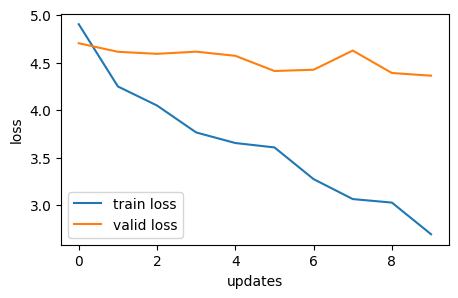

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(train_losses, label = 'train loss')
ax.plot(valid_losses, label = 'valid loss')
plt.legend()
ax.set_xlabel('updates')
ax.set_ylabel('loss')

In [31]:
input_dim   = len(vocab_en)
output_dim  = len(vocab_th)
emb_dim     = 1024  
hid_dim     = 1024  
n_layers    = 2   
dropout     = 0.5

additive_attn = AdditiveAttentionModule(hid_dim).to(device)

enc = Encoder(input_dim,  emb_dim, hid_dim, n_layers, dropout)
dec = Decoder(output_dim, emb_dim, hid_dim, n_layers, dropout,additive_attn)

model = Seq2Seq(enc, dec, device).to(device)

lr = 1e-3

#training hyperparameters
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss(ignore_index = PAD_IDX)

In [32]:
best_valid_loss = float('inf')
num_epochs = 10
clip       = 1

save_path = f'seq2seqAddictiveAttention.pt'

train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    
    # start_time = time.time()

    train_loss = train(model, train_loader, optimizer, criterion, clip, train_loader_length)
    valid_loss = evaluate(model, valid_loader, criterion, val_loader_length)
    
    #for plotting
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    # end_time = time.time()
    
    # epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), save_path)
    
    # print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')
    

	Train Loss: 4.879 | Train PPL: 131.454
	 Val. Loss: 4.785 |  Val. PPL: 119.662
	Train Loss: 4.232 | Train PPL:  68.838
	 Val. Loss: 4.591 |  Val. PPL:  98.625
	Train Loss: 3.740 | Train PPL:  42.090
	 Val. Loss: 4.571 |  Val. PPL:  96.622
	Train Loss: 3.460 | Train PPL:  31.810
	 Val. Loss: 4.272 |  Val. PPL:  71.700
	Train Loss: 3.130 | Train PPL:  22.869
	 Val. Loss: 4.299 |  Val. PPL:  73.616
	Train Loss: 2.765 | Train PPL:  15.887
	 Val. Loss: 4.188 |  Val. PPL:  65.895
	Train Loss: 2.328 | Train PPL:  10.256
	 Val. Loss: 4.248 |  Val. PPL:  69.975
	Train Loss: 1.948 | Train PPL:   7.015
	 Val. Loss: 4.295 |  Val. PPL:  73.350
	Train Loss: 1.787 | Train PPL:   5.969
	 Val. Loss: 4.248 |  Val. PPL:  69.939
	Train Loss: 1.447 | Train PPL:   4.251
	 Val. Loss: 4.484 |  Val. PPL:  88.630


Text(0, 0.5, 'loss')

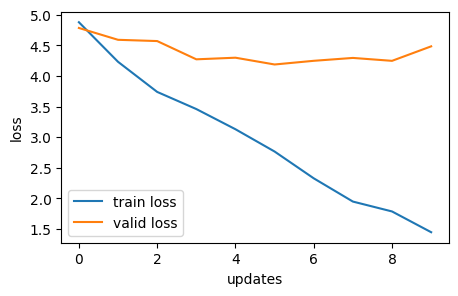

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(train_losses, label = 'train loss')
ax.plot(valid_losses, label = 'valid loss')
plt.legend()
ax.set_xlabel('updates')
ax.set_ylabel('loss')

| Attentions | Training Loss | Training PPL | Validation Loss | Validation PPL |
| :--- | :--- | :--- | :--- | :--- |
| General Attention | 2.790 | 16.284 | 4.765 | 117.284 |
| Additive Attention | 1.491 | 4.441 | 4.325 | 75.558 |

In [34]:
val_data[0]

('I received a bank transfer form at the counter.',
 'รับใบโอนเงินที่เคาน์เตอร์แล้วครับ')

In [35]:
src_text = torch.tensor(val_en_ids[0]).to(device)
src_text = src_text.reshape(-1, 1) 

In [36]:
trg_text = torch.tensor(val_th_ids[0]).to(device)
trg_text = trg_text.reshape(-1, 1)

In [37]:
model.load_state_dict(torch.load(save_path))

model.eval()
with torch.no_grad():
    output = model(src_text, trg_text, 0) 

In [38]:
output = output.squeeze(1)

In [39]:
output_max = output.argmax(1) #returns max indices


In [40]:
mapping = vocab_th.get_itos()

In [41]:
for token in output_max:
    print(mapping[token.item()])

<unk>
อัน
มาก
ทำ
ทาง
ฮา
เกลือ
อาหารเช้า
ประตู
ซ้าย


In [42]:
torch.save(vocab_en, 'vocab_en.pt')
torch.save(vocab_th, 'vocab_th.pt')